In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras.preprocessing as pre
pd.reset_option('display.max_rows')


# Importing the dataset
X_dataset = pd.read_csv('dataset_without_intervals.csv')


In [4]:
X_dataset

,Unnamed: 0,subject_eyeD,subject_id,eye,number _visits,primary_dx,dob,gender,race,visit_date,...,rnfl_inf,rnfl_tempinf,md,p_md,psd,p_psd,vfi,age,days_from_baseline,visit_number
0,0,4OD,4,OD,4,GL,1946-01-07,male,white,2010-03-15,...,29,20,0.372392,5,2.041738,3,94.0,64.0,0.0,1
1,1,4OD,4,OD,4,GL,1946-01-07,male,white,2011-04-04,...,29,20,0.457088,3,2.588213,5,94.0,65.0,385.0,2
2,2,4OD,4,OD,4,GL,1946-01-07,male,white,2012-04-16,...,28,19,0.582103,2,1.905461,3,96.0,66.0,763.0,3
3,3,4OD,4,OD,4,GL,1946-01-07,male,white,2013-01-14,...,29,20,0.407380,4,2.142891,4,95.0,67.0,1036.0,4
4,4,4OS,4,OS,6,GL,1946-01-07,male,white,2009-03-30,...,23,18,0.141906,5,3.749730,5,83.0,63.0,0.0,1
5,5,4OS,4,OS,6,GL,1946-01-07,male,white,2010-03-15,...,23,15,0.020845,5,5.093309,5,54.0,64.0,350.0,2
6,6,4OS,4,OS,6,GL,1946-01-07,male,white,2011-04-04,...,23,14,0.128825,5,2.824880,5,85.0,65.0,735.0,3
7,7,4OS,4,OS,6,GL,1946-01-07,male,white,2012-04-16,...,23,15,0.201372,5,2.798981,5,83.0,66.0,1113.0,4
8,8,4OS,4,OS,6,GL,1946-01-07,male,white,2013-01-14,...,23,17,0.104232,5,3.273407,5,76.0,67.0,1386.0,5
9,9,4OS,4,OS,6,GL,1946-01-07,male,white,2017-03-21,...,23,15,0.106905,1,4.265795,1,78.0,71.0,2913.0,6


In [5]:
X_dataset = X_dataset.drop(['Unnamed: 0', 'subject_id', 'eye', 'number _visits',
       'dob', 'visit_date', 'baseline_visit', 'days_from_baseline', 'visit_number'], axis = 1)

In [6]:
X_dataset.columns

Index(['subject_eyeD', 'primary_dx', 'gender', 'race', 'avg_cd_ratio',
       'gca_average', 'gca_tempsup', 'gca_sup', 'gca_nassup', 'gca_nasinf',
       'gca_inf', 'gca_tempinf', 'rnfl_average', 'rnfl_tempsup', 'rnfl_sup',
       'rnfl_nassup', 'rnfl_nasinf', 'rnfl_inf', 'rnfl_tempinf', 'md', 'p_md',
       'psd', 'p_psd', 'vfi', 'age'],
      dtype='object')

In [7]:
print(X_dataset['primary_dx'].value_counts())
print(X_dataset['gender'].value_counts())
print(X_dataset['race'].value_counts())

GL          3524
GS          1735
PDS           21
PDS/OHTN       4
Name: primary_dx, dtype: int64
female    3081
male      2203
Name: gender, dtype: int64
white       4002
black       1028
asian        250
hispanic       4
Name: race, dtype: int64


In [8]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder

#label encoding dx: 4 total
labelencoder_X_1 = LabelEncoder()
X_dataset.iloc[:, 1] = labelencoder_X_1.fit_transform(X_dataset.iloc[:, 1])

#label encoding gender: 2 total
labelencoder_X_2 = LabelEncoder()
X_dataset.iloc[:, 2] = labelencoder_X_2.fit_transform(X_dataset.iloc[:, 2])

#label encoding race: 4 total
labelencoder_X_3 = LabelEncoder()
X_dataset.iloc[:, 3] = labelencoder_X_3.fit_transform(X_dataset.iloc[:, 3])

In [9]:
print(X_dataset['primary_dx'].value_counts())
print(X_dataset['gender'].value_counts())
print(X_dataset['race'].value_counts())

0    3524
1    1735
2      21
3       4
Name: primary_dx, dtype: int64
0    3081
1    2203
Name: gender, dtype: int64
3    4002
1    1028
0     250
2       4
Name: race, dtype: int64


In [10]:
X_dataset = pd.get_dummies(X_dataset, columns=['primary_dx', 'race'], drop_first=True)

In [11]:
dictionary = {column:i for i, column in enumerate(X_dataset.columns)}

In [12]:
X_dataset

,subject_eyeD,gender,avg_cd_ratio,gca_average,gca_tempsup,gca_sup,gca_nassup,gca_nasinf,gca_inf,gca_tempinf,...,psd,p_psd,vfi,age,primary_dx_1,primary_dx_2,primary_dx_3,race_1,race_2,race_3
0,4OD,1,0.70,66,63,61,65,71,69,68,...,2.041738,3,94.0,64.0,0,0,0,0,0,1
1,4OD,1,0.69,66,64,61,65,71,68,68,...,2.588213,5,94.0,65.0,0,0,0,0,0,1
2,4OD,1,0.72,65,63,59,65,73,67,64,...,1.905461,3,96.0,66.0,0,0,0,0,0,1
3,4OD,1,0.73,65,63,60,65,70,67,67,...,2.142891,4,95.0,67.0,0,0,0,0,0,1
4,4OS,1,0.76,54,48,53,59,57,52,57,...,3.749730,5,83.0,63.0,0,0,0,0,0,1
5,4OS,1,0.74,55,53,53,58,55,51,58,...,5.093309,5,54.0,64.0,0,0,0,0,0,1
6,4OS,1,0.76,57,56,56,59,57,53,61,...,2.824880,5,85.0,65.0,0,0,0,0,0,1
7,4OS,1,0.76,57,56,55,60,56,53,61,...,2.798981,5,83.0,66.0,0,0,0,0,0,1
8,4OS,1,0.75,56,56,56,60,56,52,59,...,3.273407,5,76.0,67.0,0,0,0,0,0,1
9,4OS,1,0.77,55,55,53,56,53,51,60,...,4.265795,1,78.0,71.0,0,0,0,0,0,1


In [13]:
X = []
y_MD = []
y_VFI = []
y_GCA = []
y_RNFL = []

for subject, dataset in X_dataset.groupby('subject_eyeD'):
    if len(dataset) > 2:
        X.append(dataset.iloc[0:len(dataset)-1,1:].values.tolist())
        y_MD.append(dataset.iloc[-1,dictionary['md']].tolist())
        y_VFI.append(dataset.iloc[-1,dictionary['vfi']].tolist())
        y_GCA.append(dataset.iloc[-1,dictionary['gca_average']].tolist())
        y_RNFL.append(dataset.iloc[-1,dictionary['rnfl_average']].tolist())

In [14]:
X = pre.sequence.pad_sequences(X, maxlen=None, dtype='float', padding='post', value=9999.0)

In [15]:
y_RNFL = np.array(y_RNFL)
y_VFI = np.array(y_VFI)
y_MD = np.array(y_MD)
y_GCA = np.array(y_GCA)

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout, Masking, BatchNormalization
from keras import optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def lstm_baseline(X, y, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 200)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 200)
    
    batch_size=10
    model = Sequential()
    model.add(Masking(mask_value=9999.0))
    model.add(BatchNormalization(axis = 1))
    model.add(LSTM(128,
                   return_sequences=True,
                  ))

    model.add(LSTM(64))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='relu'))
    
    #compile model
    model.compile(
        loss='mse',
        optimizer='adam',
        metrics=['mean_absolute_error'])

#     model.fit(X_train,y_train, epochs= 500)

    weight_path="LSTM_Interval_best_{}.hdf5".format(name)
    checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
    callbacks_list = [checkpoint, early_stop]
        
    #fit the model
    history = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val), shuffle=False, callbacks=callbacks_list, verbose=1)
    
    # plot train and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model train vs validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.savefig('loss_plot_{}.png'.format(name))
    plt.show()
    
    
    model.load_weights(weight_path)
    y_pred = model.predict(X_test)
    y_pred = y_pred.flatten()
    y_pred = y_pred.tolist()
    dictionary_DF = {'predicted':y_pred, 'actual':y_test}
    data = pd.DataFrame(dictionary_DF)
    data.to_csv('Predicted_vs_Actual_of_{}'.format(name))
    
    mean_absolute_error = abs(data['predicted']-data['actual'])
    mean_absolute_error = mean_absolute_error.describe()
    mean_absolute_error.to_csv('MAE_of_{}_Predicted_vs_Actual'.format(name))
    
    return model

# history = model.fit(X_train, y_train, epochs=50, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False)


Train on 522 samples, validate on 131 samples
Epoch 1/500
522/522 [==============================] - 3s 6ms/step - loss: 0.2549 - mean_absolute_error: 0.4031 - val_loss: 0.1705 - val_mean_absolute_error: 0.3265

Epoch 00001: val_loss improved from inf to 0.17050, saving model to LSTM_Interval_best_MD.hdf5
Epoch 2/500
522/522 [==============================] - 1s 1ms/step - loss: 0.1637 - mean_absolute_error: 0.3291 - val_loss: 0.1324 - val_mean_absolute_error: 0.2831

Epoch 00002: val_loss improved from 0.17050 to 0.13244, saving model to LSTM_Interval_best_MD.hdf5
Epoch 3/500
522/522 [==============================] - 1s 1ms/step - loss: 0.1242 - mean_absolute_error: 0.2743 - val_loss: 0.1062 - val_mean_absolute_error: 0.2391

Epoch 00003: val_loss improved from 0.13244 to 0.10625, saving model to LSTM_Interval_best_MD.hdf5
Epoch 4/500
522/522 [==============================] - 1s 1ms/step - loss: 0.1268 - mean_absolute_error: 0.2753 - val_loss: 0.1022 - val_mean_absolute_error: 0.236


Epoch 00035: val_loss did not improve from 0.06574
Epoch 36/500
522/522 [==============================] - 1s 1ms/step - loss: 0.0743 - mean_absolute_error: 0.1928 - val_loss: 0.0814 - val_mean_absolute_error: 0.1867

Epoch 00036: val_loss did not improve from 0.06574
Epoch 37/500
522/522 [==============================] - 1s 1ms/step - loss: 0.0726 - mean_absolute_error: 0.1890 - val_loss: 0.0629 - val_mean_absolute_error: 0.1688

Epoch 00037: val_loss improved from 0.06574 to 0.06287, saving model to LSTM_Interval_best_MD.hdf5
Epoch 38/500
522/522 [==============================] - 1s 1ms/step - loss: 0.0659 - mean_absolute_error: 0.1849 - val_loss: 0.0641 - val_mean_absolute_error: 0.1657

Epoch 00038: val_loss did not improve from 0.06287
Epoch 39/500
522/522 [==============================] - 1s 1ms/step - loss: 0.0719 - mean_absolute_error: 0.1898 - val_loss: 0.0773 - val_mean_absolute_error: 0.1816

Epoch 00039: val_loss did not improve from 0.06287
Epoch 40/500
522/522 [======

522/522 [==============================] - 1s 1ms/step - loss: 0.0581 - mean_absolute_error: 0.1682 - val_loss: 0.0681 - val_mean_absolute_error: 0.1716

Epoch 00072: val_loss did not improve from 0.05886
Epoch 73/500
522/522 [==============================] - 1s 1ms/step - loss: 0.0596 - mean_absolute_error: 0.1726 - val_loss: 0.0776 - val_mean_absolute_error: 0.1836

Epoch 00073: val_loss did not improve from 0.05886
Epoch 74/500
522/522 [==============================] - 1s 1ms/step - loss: 0.0598 - mean_absolute_error: 0.1738 - val_loss: 0.0674 - val_mean_absolute_error: 0.1711

Epoch 00074: val_loss did not improve from 0.05886
Epoch 75/500
522/522 [==============================] - 1s 1ms/step - loss: 0.0505 - mean_absolute_error: 0.1576 - val_loss: 0.0674 - val_mean_absolute_error: 0.1705

Epoch 00075: val_loss did not improve from 0.05886
Epoch 76/500
522/522 [==============================] - 1s 1ms/step - loss: 0.0590 - mean_absolute_error: 0.1708 - val_loss: 0.0754 - val_mea

522/522 [==============================] - 1s 1ms/step - loss: 0.0449 - mean_absolute_error: 0.1474 - val_loss: 0.0638 - val_mean_absolute_error: 0.1708

Epoch 00109: val_loss did not improve from 0.05855
Epoch 110/500
522/522 [==============================] - 1s 1ms/step - loss: 0.0455 - mean_absolute_error: 0.1489 - val_loss: 0.0674 - val_mean_absolute_error: 0.1762

Epoch 00110: val_loss did not improve from 0.05855
Epoch 111/500
522/522 [==============================] - 1s 1ms/step - loss: 0.0468 - mean_absolute_error: 0.1527 - val_loss: 0.0619 - val_mean_absolute_error: 0.1663

Epoch 00111: val_loss did not improve from 0.05855
Epoch 112/500
522/522 [==============================] - 1s 1ms/step - loss: 0.0478 - mean_absolute_error: 0.1493 - val_loss: 0.0716 - val_mean_absolute_error: 0.1799

Epoch 00112: val_loss did not improve from 0.05855
Epoch 113/500
522/522 [==============================] - 1s 1ms/step - loss: 0.0453 - mean_absolute_error: 0.1480 - val_loss: 0.0716 - val

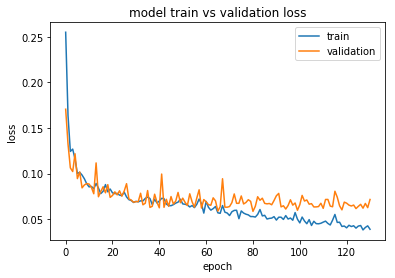

In [21]:
lstm_baseline(X,y_MD,"MD")

Train on 522 samples, validate on 131 samples
Epoch 1/500
522/522 [==============================] - 3s 6ms/step - loss: 7954.8502 - mean_absolute_error: 87.1981 - val_loss: 7028.9057 - val_mean_absolute_error: 80.8727

Epoch 00001: val_loss improved from inf to 7028.90571, saving model to LSTM_Interval_best_VFI.hdf5
Epoch 2/500
522/522 [==============================] - 1s 1ms/step - loss: 6615.1653 - mean_absolute_error: 79.1853 - val_loss: 5741.1733 - val_mean_absolute_error: 72.5851

Epoch 00002: val_loss improved from 7028.90571 to 5741.17326, saving model to LSTM_Interval_best_VFI.hdf5
Epoch 3/500
522/522 [==============================] - 1s 1ms/step - loss: 5530.8319 - mean_absolute_error: 72.2085 - val_loss: 4854.4797 - val_mean_absolute_error: 66.6623

Epoch 00003: val_loss improved from 5741.17326 to 4854.47971, saving model to LSTM_Interval_best_VFI.hdf5
Epoch 4/500
522/522 [==============================] - 1s 1ms/step - loss: 4671.9088 - mean_absolute_error: 66.2242 - val

Epoch 32/500
522/522 [==============================] - 1s 1ms/step - loss: 273.3922 - mean_absolute_error: 12.5365 - val_loss: 106.4777 - val_mean_absolute_error: 7.0548

Epoch 00032: val_loss did not improve from 93.78884
Epoch 33/500
522/522 [==============================] - 1s 1ms/step - loss: 238.4473 - mean_absolute_error: 11.6974 - val_loss: 97.0536 - val_mean_absolute_error: 6.1483

Epoch 00033: val_loss did not improve from 93.78884
Epoch 34/500
522/522 [==============================] - 1s 1ms/step - loss: 282.6729 - mean_absolute_error: 13.1081 - val_loss: 80.7055 - val_mean_absolute_error: 5.5895

Epoch 00034: val_loss improved from 93.78884 to 80.70551, saving model to LSTM_Interval_best_VFI.hdf5
Epoch 35/500
522/522 [==============================] - 1s 1ms/step - loss: 269.1856 - mean_absolute_error: 12.4315 - val_loss: 81.6938 - val_mean_absolute_error: 5.0808

Epoch 00035: val_loss did not improve from 80.70551
Epoch 36/500
522/522 [==============================] - 1

Epoch 68/500
522/522 [==============================] - 1s 1ms/step - loss: 209.8771 - mean_absolute_error: 11.0534 - val_loss: 62.8917 - val_mean_absolute_error: 4.7840

Epoch 00068: val_loss did not improve from 57.72482
Epoch 69/500
522/522 [==============================] - 1s 1ms/step - loss: 224.7976 - mean_absolute_error: 11.5494 - val_loss: 70.8615 - val_mean_absolute_error: 6.2505

Epoch 00069: val_loss did not improve from 57.72482
Epoch 70/500
522/522 [==============================] - 1s 1ms/step - loss: 223.2248 - mean_absolute_error: 11.6803 - val_loss: 71.8144 - val_mean_absolute_error: 5.8485

Epoch 00070: val_loss did not improve from 57.72482
Epoch 71/500
522/522 [==============================] - 1s 1ms/step - loss: 232.2157 - mean_absolute_error: 11.5443 - val_loss: 100.6090 - val_mean_absolute_error: 8.0893

Epoch 00071: val_loss did not improve from 57.72482
Epoch 72/500
522/522 [==============================] - 1s 1ms/step - loss: 225.3373 - mean_absolute_error:

522/522 [==============================] - 1s 1ms/step - loss: 213.5968 - mean_absolute_error: 11.2442 - val_loss: 74.4434 - val_mean_absolute_error: 6.7610

Epoch 00104: val_loss did not improve from 50.55700
Epoch 105/500
522/522 [==============================] - 1s 1ms/step - loss: 218.4182 - mean_absolute_error: 11.3950 - val_loss: 68.9555 - val_mean_absolute_error: 6.2430

Epoch 00105: val_loss did not improve from 50.55700
Epoch 106/500
522/522 [==============================] - 1s 1ms/step - loss: 202.0828 - mean_absolute_error: 10.7022 - val_loss: 58.3478 - val_mean_absolute_error: 5.2262

Epoch 00106: val_loss did not improve from 50.55700
Epoch 107/500
522/522 [==============================] - 1s 1ms/step - loss: 189.7126 - mean_absolute_error: 10.9894 - val_loss: 47.2759 - val_mean_absolute_error: 4.2773

Epoch 00107: val_loss improved from 50.55700 to 47.27590, saving model to LSTM_Interval_best_VFI.hdf5
Epoch 108/500
522/522 [==============================] - 1s 1ms/step

522/522 [==============================] - 1s 2ms/step - loss: 191.6891 - mean_absolute_error: 10.8331 - val_loss: 38.3304 - val_mean_absolute_error: 4.6765

Epoch 00139: val_loss did not improve from 32.10850
Epoch 140/500
522/522 [==============================] - 1s 2ms/step - loss: 198.4965 - mean_absolute_error: 10.9687 - val_loss: 33.3508 - val_mean_absolute_error: 4.0485

Epoch 00140: val_loss did not improve from 32.10850
Epoch 141/500
522/522 [==============================] - 1s 2ms/step - loss: 198.8787 - mean_absolute_error: 11.0208 - val_loss: 40.1682 - val_mean_absolute_error: 4.3522

Epoch 00141: val_loss did not improve from 32.10850
Epoch 142/500
522/522 [==============================] - 1s 1ms/step - loss: 189.2384 - mean_absolute_error: 10.2315 - val_loss: 49.5899 - val_mean_absolute_error: 5.2562

Epoch 00142: val_loss did not improve from 32.10850
Epoch 143/500
522/522 [==============================] - 1s 1ms/step - loss: 193.1167 - mean_absolute_error: 10.8215 -

522/522 [==============================] - 1s 1ms/step - loss: 188.5526 - mean_absolute_error: 10.4858 - val_loss: 22.0733 - val_mean_absolute_error: 3.0821

Epoch 00174: val_loss improved from 22.73936 to 22.07334, saving model to LSTM_Interval_best_VFI.hdf5
Epoch 175/500
522/522 [==============================] - 1s 2ms/step - loss: 206.7278 - mean_absolute_error: 11.2205 - val_loss: 20.4680 - val_mean_absolute_error: 3.0655

Epoch 00175: val_loss improved from 22.07334 to 20.46805, saving model to LSTM_Interval_best_VFI.hdf5
Epoch 176/500
522/522 [==============================] - 1s 2ms/step - loss: 176.2573 - mean_absolute_error: 10.3340 - val_loss: 30.3342 - val_mean_absolute_error: 4.5273

Epoch 00176: val_loss did not improve from 20.46805
Epoch 177/500
522/522 [==============================] - 1s 1ms/step - loss: 167.1512 - mean_absolute_error: 9.8736 - val_loss: 26.6348 - val_mean_absolute_error: 3.7940

Epoch 00177: val_loss did not improve from 20.46805
Epoch 178/500
522/5

522/522 [==============================] - 1s 1ms/step - loss: 198.0942 - mean_absolute_error: 10.9618 - val_loss: 17.8492 - val_mean_absolute_error: 2.8653

Epoch 00210: val_loss improved from 18.88195 to 17.84924, saving model to LSTM_Interval_best_VFI.hdf5
Epoch 211/500
522/522 [==============================] - 1s 1ms/step - loss: 191.1387 - mean_absolute_error: 10.8274 - val_loss: 24.8031 - val_mean_absolute_error: 3.3615

Epoch 00211: val_loss did not improve from 17.84924
Epoch 212/500
522/522 [==============================] - 1s 1ms/step - loss: 169.6773 - mean_absolute_error: 10.3265 - val_loss: 36.5138 - val_mean_absolute_error: 4.7398

Epoch 00212: val_loss did not improve from 17.84924
Epoch 213/500
522/522 [==============================] - 1s 1ms/step - loss: 167.5127 - mean_absolute_error: 9.8559 - val_loss: 25.6732 - val_mean_absolute_error: 3.7088

Epoch 00213: val_loss did not improve from 17.84924
Epoch 214/500
522/522 [==============================] - 1s 1ms/step 

522/522 [==============================] - 1s 1ms/step - loss: 169.7622 - mean_absolute_error: 10.1772 - val_loss: 21.4057 - val_mean_absolute_error: 3.4424

Epoch 00246: val_loss did not improve from 17.84924
Epoch 247/500
522/522 [==============================] - 1s 1ms/step - loss: 190.7128 - mean_absolute_error: 10.5030 - val_loss: 25.0520 - val_mean_absolute_error: 3.6804

Epoch 00247: val_loss did not improve from 17.84924
Epoch 248/500
522/522 [==============================] - 1s 1ms/step - loss: 171.2035 - mean_absolute_error: 10.2532 - val_loss: 35.1789 - val_mean_absolute_error: 4.2358

Epoch 00248: val_loss did not improve from 17.84924
Epoch 249/500
522/522 [==============================] - 1s 1ms/step - loss: 169.1341 - mean_absolute_error: 10.0920 - val_loss: 25.2209 - val_mean_absolute_error: 3.4821

Epoch 00249: val_loss did not improve from 17.84924
Epoch 250/500
522/522 [==============================] - 1s 1ms/step - loss: 182.5784 - mean_absolute_error: 10.2248 -

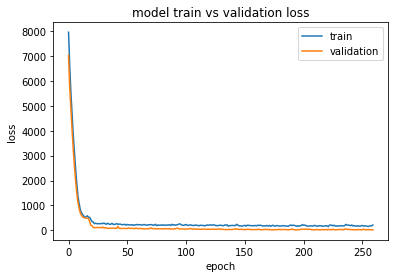

In [22]:
lstm_baseline(X,y_VFI,"VFI")

Train on 522 samples, validate on 131 samples
Epoch 1/500
522/522 [==============================] - 4s 7ms/step - loss: 4702.6889 - mean_absolute_error: 67.8814 - val_loss: 4087.2674 - val_mean_absolute_error: 63.2164

Epoch 00001: val_loss improved from inf to 4087.26741, saving model to LSTM_Interval_best_GCA.hdf5
Epoch 2/500
522/522 [==============================] - 1s 1ms/step - loss: 3729.2996 - mean_absolute_error: 60.2235 - val_loss: 3072.0769 - val_mean_absolute_error: 54.6112

Epoch 00002: val_loss improved from 4087.26741 to 3072.07686, saving model to LSTM_Interval_best_GCA.hdf5
Epoch 3/500
522/522 [==============================] - 1s 1ms/step - loss: 2919.0866 - mean_absolute_error: 53.0583 - val_loss: 2425.4521 - val_mean_absolute_error: 48.3042

Epoch 00003: val_loss improved from 3072.07686 to 2425.45213, saving model to LSTM_Interval_best_GCA.hdf5
Epoch 4/500
522/522 [==============================] - 1s 1ms/step - loss: 2296.5176 - mean_absolute_error: 46.6750 - val

522/522 [==============================] - 1s 1ms/step - loss: 177.4426 - mean_absolute_error: 10.5467 - val_loss: 78.5502 - val_mean_absolute_error: 6.9685

Epoch 00031: val_loss improved from 80.04733 to 78.55020, saving model to LSTM_Interval_best_GCA.hdf5
Epoch 32/500
522/522 [==============================] - 1s 1ms/step - loss: 168.7126 - mean_absolute_error: 10.3901 - val_loss: 63.8795 - val_mean_absolute_error: 6.0960

Epoch 00032: val_loss improved from 78.55020 to 63.87947, saving model to LSTM_Interval_best_GCA.hdf5
Epoch 33/500
522/522 [==============================] - 1s 1ms/step - loss: 156.1903 - mean_absolute_error: 10.0251 - val_loss: 60.4713 - val_mean_absolute_error: 6.0739

Epoch 00033: val_loss improved from 63.87947 to 60.47131, saving model to LSTM_Interval_best_GCA.hdf5
Epoch 34/500
522/522 [==============================] - 1s 1ms/step - loss: 171.7921 - mean_absolute_error: 10.4662 - val_loss: 43.9161 - val_mean_absolute_error: 4.8694

Epoch 00034: val_loss i

522/522 [==============================] - 1s 1ms/step - loss: 114.7295 - mean_absolute_error: 8.4578 - val_loss: 20.2658 - val_mean_absolute_error: 3.3949

Epoch 00064: val_loss did not improve from 19.40797
Epoch 65/500
522/522 [==============================] - 1s 1ms/step - loss: 126.0965 - mean_absolute_error: 8.8009 - val_loss: 15.7799 - val_mean_absolute_error: 2.7146

Epoch 00065: val_loss improved from 19.40797 to 15.77990, saving model to LSTM_Interval_best_GCA.hdf5
Epoch 66/500
522/522 [==============================] - 1s 1ms/step - loss: 128.7908 - mean_absolute_error: 8.9403 - val_loss: 16.0870 - val_mean_absolute_error: 2.8691

Epoch 00066: val_loss did not improve from 15.77990
Epoch 67/500
522/522 [==============================] - 1s 1ms/step - loss: 111.5913 - mean_absolute_error: 8.5312 - val_loss: 17.4392 - val_mean_absolute_error: 3.0615

Epoch 00067: val_loss did not improve from 15.77990
Epoch 68/500
522/522 [==============================] - 1s 1ms/step - loss:

522/522 [==============================] - 1s 1ms/step - loss: 109.7440 - mean_absolute_error: 8.3472 - val_loss: 19.4283 - val_mean_absolute_error: 3.6911

Epoch 00100: val_loss did not improve from 12.25046
Epoch 101/500
522/522 [==============================] - 1s 1ms/step - loss: 114.1535 - mean_absolute_error: 8.5844 - val_loss: 24.7482 - val_mean_absolute_error: 4.2947

Epoch 00101: val_loss did not improve from 12.25046
Epoch 102/500
522/522 [==============================] - 1s 1ms/step - loss: 119.5767 - mean_absolute_error: 8.7358 - val_loss: 15.1559 - val_mean_absolute_error: 2.9475

Epoch 00102: val_loss did not improve from 12.25046
Epoch 103/500
522/522 [==============================] - 1s 1ms/step - loss: 110.4138 - mean_absolute_error: 7.9786 - val_loss: 11.9128 - val_mean_absolute_error: 2.3943

Epoch 00103: val_loss improved from 12.25046 to 11.91281, saving model to LSTM_Interval_best_GCA.hdf5
Epoch 104/500
522/522 [==============================] - 1s 1ms/step - l

522/522 [==============================] - 1s 1ms/step - loss: 125.7738 - mean_absolute_error: 8.6705 - val_loss: 12.5582 - val_mean_absolute_error: 2.7397

Epoch 00136: val_loss did not improve from 10.57010
Epoch 137/500
522/522 [==============================] - 1s 1ms/step - loss: 111.6524 - mean_absolute_error: 8.3277 - val_loss: 15.3813 - val_mean_absolute_error: 3.1139

Epoch 00137: val_loss did not improve from 10.57010
Epoch 138/500
522/522 [==============================] - 1s 1ms/step - loss: 116.3563 - mean_absolute_error: 8.5739 - val_loss: 18.0168 - val_mean_absolute_error: 3.4709

Epoch 00138: val_loss did not improve from 10.57010
Epoch 139/500
522/522 [==============================] - 1s 1ms/step - loss: 101.8897 - mean_absolute_error: 8.0099 - val_loss: 15.1374 - val_mean_absolute_error: 3.1313

Epoch 00139: val_loss did not improve from 10.57010
Epoch 140/500
522/522 [==============================] - 1s 1ms/step - loss: 107.6085 - mean_absolute_error: 8.0745 - val_

Epoch 172/500
522/522 [==============================] - 1s 1ms/step - loss: 104.4226 - mean_absolute_error: 8.0285 - val_loss: 11.9427 - val_mean_absolute_error: 2.6802

Epoch 00172: val_loss did not improve from 8.79717
Epoch 173/500
522/522 [==============================] - 1s 1ms/step - loss: 119.2295 - mean_absolute_error: 8.6058 - val_loss: 13.3545 - val_mean_absolute_error: 2.9560

Epoch 00173: val_loss did not improve from 8.79717
Epoch 174/500
522/522 [==============================] - 1s 1ms/step - loss: 108.4175 - mean_absolute_error: 8.2298 - val_loss: 10.2059 - val_mean_absolute_error: 2.4269

Epoch 00174: val_loss did not improve from 8.79717
Epoch 175/500
522/522 [==============================] - 1s 1ms/step - loss: 105.4764 - mean_absolute_error: 8.0106 - val_loss: 9.0931 - val_mean_absolute_error: 2.1117

Epoch 00175: val_loss did not improve from 8.79717
Epoch 176/500
522/522 [==============================] - 1s 1ms/step - loss: 115.7765 - mean_absolute_error: 8.52


Epoch 00208: val_loss did not improve from 8.10580
Epoch 209/500
522/522 [==============================] - 1s 1ms/step - loss: 107.0593 - mean_absolute_error: 8.2532 - val_loss: 9.4622 - val_mean_absolute_error: 2.3537

Epoch 00209: val_loss did not improve from 8.10580
Epoch 210/500
522/522 [==============================] - 1s 1ms/step - loss: 120.9297 - mean_absolute_error: 8.6800 - val_loss: 18.4897 - val_mean_absolute_error: 3.7651

Epoch 00210: val_loss did not improve from 8.10580
Epoch 211/500
522/522 [==============================] - 1s 1ms/step - loss: 118.6323 - mean_absolute_error: 8.4534 - val_loss: 9.3069 - val_mean_absolute_error: 2.2665

Epoch 00211: val_loss did not improve from 8.10580
Epoch 212/500
522/522 [==============================] - 1s 1ms/step - loss: 102.8966 - mean_absolute_error: 8.1240 - val_loss: 9.1277 - val_mean_absolute_error: 2.2212

Epoch 00212: val_loss did not improve from 8.10580
Epoch 213/500
522/522 [==============================] - 1s 1ms

522/522 [==============================] - 1s 1ms/step - loss: 100.2925 - mean_absolute_error: 7.8168 - val_loss: 8.1064 - val_mean_absolute_error: 1.9972

Epoch 00245: val_loss did not improve from 6.72240
Epoch 246/500
522/522 [==============================] - 1s 1ms/step - loss: 108.9232 - mean_absolute_error: 8.1221 - val_loss: 9.8492 - val_mean_absolute_error: 2.2883

Epoch 00246: val_loss did not improve from 6.72240
Epoch 247/500
522/522 [==============================] - 1s 1ms/step - loss: 110.2623 - mean_absolute_error: 8.3683 - val_loss: 12.9107 - val_mean_absolute_error: 2.7476

Epoch 00247: val_loss did not improve from 6.72240
Epoch 248/500
522/522 [==============================] - 1s 1ms/step - loss: 100.0659 - mean_absolute_error: 7.9892 - val_loss: 10.1076 - val_mean_absolute_error: 2.4393

Epoch 00248: val_loss did not improve from 6.72240
Epoch 249/500
522/522 [==============================] - 1s 1ms/step - loss: 106.2196 - mean_absolute_error: 8.2340 - val_loss: 


Epoch 00281: val_loss did not improve from 6.29173
Epoch 282/500
522/522 [==============================] - 1s 1ms/step - loss: 104.6341 - mean_absolute_error: 8.0829 - val_loss: 7.2663 - val_mean_absolute_error: 2.0398

Epoch 00282: val_loss did not improve from 6.29173
Epoch 283/500
522/522 [==============================] - 1s 1ms/step - loss: 112.1120 - mean_absolute_error: 8.4117 - val_loss: 7.6196 - val_mean_absolute_error: 2.0639

Epoch 00283: val_loss did not improve from 6.29173
Epoch 284/500
522/522 [==============================] - 1s 1ms/step - loss: 107.8218 - mean_absolute_error: 8.0121 - val_loss: 11.0993 - val_mean_absolute_error: 2.5495

Epoch 00284: val_loss did not improve from 6.29173
Epoch 285/500
522/522 [==============================] - 1s 1ms/step - loss: 102.9239 - mean_absolute_error: 7.7620 - val_loss: 10.5683 - val_mean_absolute_error: 2.5334

Epoch 00285: val_loss did not improve from 6.29173
Epoch 286/500
522/522 [==============================] - 1s 1m

522/522 [==============================] - 1s 1ms/step - loss: 105.6503 - mean_absolute_error: 8.0063 - val_loss: 10.6825 - val_mean_absolute_error: 2.6211

Epoch 00319: val_loss did not improve from 6.29173
Epoch 320/500
522/522 [==============================] - 1s 1ms/step - loss: 117.8089 - mean_absolute_error: 8.7943 - val_loss: 13.6691 - val_mean_absolute_error: 3.1466

Epoch 00320: val_loss did not improve from 6.29173
Epoch 00320: early stopping


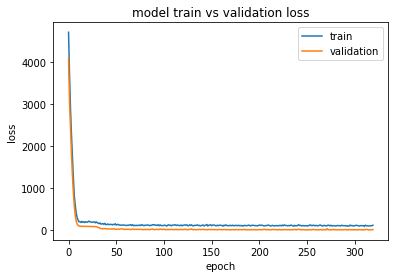

In [23]:
lstm_baseline(X,y_GCA,"GCA")

Train on 522 samples, validate on 131 samples
Epoch 1/500
522/522 [==============================] - 3s 7ms/step - loss: 5706.2796 - mean_absolute_error: 74.3250 - val_loss: 5202.1395 - val_mean_absolute_error: 70.8036

Epoch 00001: val_loss improved from inf to 5202.13953, saving model to LSTM_Interval_best_RNFL.hdf5
Epoch 2/500
522/522 [==============================] - 1s 2ms/step - loss: 4720.8920 - mean_absolute_error: 67.3043 - val_loss: 4240.0614 - val_mean_absolute_error: 63.6572

Epoch 00002: val_loss improved from 5202.13953 to 4240.06136, saving model to LSTM_Interval_best_RNFL.hdf5
Epoch 3/500
522/522 [==============================] - 1s 1ms/step - loss: 3911.9689 - mean_absolute_error: 60.9675 - val_loss: 3569.5855 - val_mean_absolute_error: 58.1385

Epoch 00003: val_loss improved from 4240.06136 to 3569.58552, saving model to LSTM_Interval_best_RNFL.hdf5
Epoch 4/500
522/522 [==============================] - 1s 1ms/step - loss: 3258.5630 - mean_absolute_error: 55.2860 - 

522/522 [==============================] - 1s 1ms/step - loss: 315.2960 - mean_absolute_error: 14.3870 - val_loss: 189.0507 - val_mean_absolute_error: 11.0634

Epoch 00031: val_loss improved from 189.51442 to 189.05075, saving model to LSTM_Interval_best_RNFL.hdf5
Epoch 32/500
522/522 [==============================] - 1s 2ms/step - loss: 308.7411 - mean_absolute_error: 13.8555 - val_loss: 190.3493 - val_mean_absolute_error: 11.0863

Epoch 00032: val_loss did not improve from 189.05075
Epoch 33/500
522/522 [==============================] - 1s 1ms/step - loss: 309.4397 - mean_absolute_error: 13.8861 - val_loss: 193.4352 - val_mean_absolute_error: 11.1690

Epoch 00033: val_loss did not improve from 189.05075
Epoch 34/500
522/522 [==============================] - 1s 1ms/step - loss: 328.2486 - mean_absolute_error: 14.2312 - val_loss: 189.0117 - val_mean_absolute_error: 11.0563

Epoch 00034: val_loss improved from 189.05075 to 189.01172, saving model to LSTM_Interval_best_RNFL.hdf5
Epoch

522/522 [==============================] - 1s 1ms/step - loss: 177.9091 - mean_absolute_error: 10.3377 - val_loss: 49.4965 - val_mean_absolute_error: 4.9145

Epoch 00063: val_loss improved from 50.46170 to 49.49650, saving model to LSTM_Interval_best_RNFL.hdf5
Epoch 64/500
522/522 [==============================] - 1s 1ms/step - loss: 166.3918 - mean_absolute_error: 10.0616 - val_loss: 50.1273 - val_mean_absolute_error: 5.0505

Epoch 00064: val_loss did not improve from 49.49650
Epoch 65/500
522/522 [==============================] - 1s 1ms/step - loss: 153.7595 - mean_absolute_error: 9.6491 - val_loss: 59.3924 - val_mean_absolute_error: 5.7672

Epoch 00065: val_loss did not improve from 49.49650
Epoch 66/500
522/522 [==============================] - 1s 1ms/step - loss: 195.3224 - mean_absolute_error: 10.8680 - val_loss: 61.6981 - val_mean_absolute_error: 5.6813

Epoch 00066: val_loss did not improve from 49.49650
Epoch 67/500
522/522 [==============================] - 1s 1ms/step - l


Epoch 00097: val_loss did not improve from 32.46796
Epoch 98/500
522/522 [==============================] - 1s 1ms/step - loss: 163.3389 - mean_absolute_error: 10.1965 - val_loss: 42.0190 - val_mean_absolute_error: 4.6930

Epoch 00098: val_loss did not improve from 32.46796
Epoch 99/500
522/522 [==============================] - 1s 1ms/step - loss: 146.1724 - mean_absolute_error: 9.4319 - val_loss: 43.6781 - val_mean_absolute_error: 4.9796

Epoch 00099: val_loss did not improve from 32.46796
Epoch 100/500
522/522 [==============================] - 1s 1ms/step - loss: 159.8280 - mean_absolute_error: 9.8329 - val_loss: 38.7603 - val_mean_absolute_error: 4.5003

Epoch 00100: val_loss did not improve from 32.46796
Epoch 101/500
522/522 [==============================] - 1s 1ms/step - loss: 146.5809 - mean_absolute_error: 9.4248 - val_loss: 31.4486 - val_mean_absolute_error: 3.9889

Epoch 00101: val_loss improved from 32.46796 to 31.44856, saving model to LSTM_Interval_best_RNFL.hdf5
Epoch

522/522 [==============================] - 1s 1ms/step - loss: 145.5825 - mean_absolute_error: 9.5877 - val_loss: 27.0456 - val_mean_absolute_error: 3.7096

Epoch 00134: val_loss improved from 28.38607 to 27.04559, saving model to LSTM_Interval_best_RNFL.hdf5
Epoch 135/500
522/522 [==============================] - 1s 1ms/step - loss: 147.7714 - mean_absolute_error: 9.7007 - val_loss: 31.2841 - val_mean_absolute_error: 3.8697

Epoch 00135: val_loss did not improve from 27.04559
Epoch 136/500
522/522 [==============================] - 1s 1ms/step - loss: 153.3894 - mean_absolute_error: 9.6163 - val_loss: 34.1872 - val_mean_absolute_error: 4.3579

Epoch 00136: val_loss did not improve from 27.04559
Epoch 137/500
522/522 [==============================] - 1s 1ms/step - loss: 169.9263 - mean_absolute_error: 10.1067 - val_loss: 29.8559 - val_mean_absolute_error: 3.9880

Epoch 00137: val_loss did not improve from 27.04559
Epoch 138/500
522/522 [==============================] - 1s 1ms/step -

522/522 [==============================] - 1s 1ms/step - loss: 144.8136 - mean_absolute_error: 9.4975 - val_loss: 26.2090 - val_mean_absolute_error: 3.6517

Epoch 00170: val_loss did not improve from 25.76406
Epoch 171/500
522/522 [==============================] - 1s 1ms/step - loss: 145.6202 - mean_absolute_error: 9.5258 - val_loss: 28.1403 - val_mean_absolute_error: 3.7245

Epoch 00171: val_loss did not improve from 25.76406
Epoch 172/500
522/522 [==============================] - 1s 1ms/step - loss: 154.1467 - mean_absolute_error: 9.9088 - val_loss: 27.9458 - val_mean_absolute_error: 3.8125

Epoch 00172: val_loss did not improve from 25.76406
Epoch 173/500
522/522 [==============================] - 1s 1ms/step - loss: 153.1399 - mean_absolute_error: 9.8501 - val_loss: 29.3773 - val_mean_absolute_error: 4.0815

Epoch 00173: val_loss did not improve from 25.76406
Epoch 174/500
522/522 [==============================] - 1s 1ms/step - loss: 161.8586 - mean_absolute_error: 10.0134 - val

522/522 [==============================] - 1s 1ms/step - loss: 141.5137 - mean_absolute_error: 9.2861 - val_loss: 33.2528 - val_mean_absolute_error: 4.3386

Epoch 00206: val_loss did not improve from 24.21539
Epoch 207/500
522/522 [==============================] - 1s 1ms/step - loss: 132.8584 - mean_absolute_error: 9.1292 - val_loss: 42.8384 - val_mean_absolute_error: 5.0364

Epoch 00207: val_loss did not improve from 24.21539
Epoch 208/500
522/522 [==============================] - 1s 1ms/step - loss: 147.2762 - mean_absolute_error: 9.5508 - val_loss: 23.7745 - val_mean_absolute_error: 3.4845

Epoch 00208: val_loss improved from 24.21539 to 23.77446, saving model to LSTM_Interval_best_RNFL.hdf5
Epoch 209/500
522/522 [==============================] - 1s 1ms/step - loss: 142.6354 - mean_absolute_error: 9.3307 - val_loss: 26.3435 - val_mean_absolute_error: 3.6910

Epoch 00209: val_loss did not improve from 23.77446
Epoch 210/500
522/522 [==============================] - 1s 1ms/step - 

522/522 [==============================] - 1s 1ms/step - loss: 141.3247 - mean_absolute_error: 9.2740 - val_loss: 25.5140 - val_mean_absolute_error: 3.6061

Epoch 00242: val_loss did not improve from 22.42083
Epoch 243/500
522/522 [==============================] - 1s 1ms/step - loss: 150.1627 - mean_absolute_error: 9.6360 - val_loss: 23.2560 - val_mean_absolute_error: 3.4798

Epoch 00243: val_loss did not improve from 22.42083
Epoch 244/500
522/522 [==============================] - 1s 1ms/step - loss: 132.5281 - mean_absolute_error: 9.2019 - val_loss: 22.9121 - val_mean_absolute_error: 3.5293

Epoch 00244: val_loss did not improve from 22.42083
Epoch 245/500
522/522 [==============================] - 1s 1ms/step - loss: 136.8206 - mean_absolute_error: 9.1817 - val_loss: 24.5615 - val_mean_absolute_error: 3.6934

Epoch 00245: val_loss did not improve from 22.42083
Epoch 246/500
522/522 [==============================] - 1s 1ms/step - loss: 155.1415 - mean_absolute_error: 9.9764 - val_


Epoch 00278: val_loss did not improve from 22.31011
Epoch 279/500
522/522 [==============================] - 1s 1ms/step - loss: 134.8052 - mean_absolute_error: 9.1501 - val_loss: 38.9777 - val_mean_absolute_error: 4.8063

Epoch 00279: val_loss did not improve from 22.31011
Epoch 280/500
522/522 [==============================] - 1s 1ms/step - loss: 148.3403 - mean_absolute_error: 9.4381 - val_loss: 36.8608 - val_mean_absolute_error: 4.7547

Epoch 00280: val_loss did not improve from 22.31011
Epoch 281/500
522/522 [==============================] - 1s 1ms/step - loss: 131.3556 - mean_absolute_error: 9.3630 - val_loss: 23.7396 - val_mean_absolute_error: 3.5395

Epoch 00281: val_loss did not improve from 22.31011
Epoch 282/500
522/522 [==============================] - 1s 1ms/step - loss: 128.1989 - mean_absolute_error: 8.9971 - val_loss: 26.4496 - val_mean_absolute_error: 3.7269

Epoch 00282: val_loss did not improve from 22.31011
Epoch 283/500
522/522 [==============================] 

522/522 [==============================] - 1s 1ms/step - loss: 127.6402 - mean_absolute_error: 8.9213 - val_loss: 27.9596 - val_mean_absolute_error: 3.8459

Epoch 00315: val_loss did not improve from 20.85791
Epoch 316/500
522/522 [==============================] - 1s 1ms/step - loss: 130.8633 - mean_absolute_error: 9.0936 - val_loss: 30.2113 - val_mean_absolute_error: 4.0297

Epoch 00316: val_loss did not improve from 20.85791
Epoch 317/500
522/522 [==============================] - 1s 2ms/step - loss: 135.9451 - mean_absolute_error: 9.1198 - val_loss: 24.1314 - val_mean_absolute_error: 3.6803

Epoch 00317: val_loss did not improve from 20.85791
Epoch 318/500
522/522 [==============================] - 1s 2ms/step - loss: 147.0778 - mean_absolute_error: 9.2935 - val_loss: 28.7066 - val_mean_absolute_error: 4.1455

Epoch 00318: val_loss did not improve from 20.85791
Epoch 319/500
522/522 [==============================] - 1s 1ms/step - loss: 144.1395 - mean_absolute_error: 9.3457 - val_


Epoch 00351: val_loss did not improve from 20.58959
Epoch 352/500
522/522 [==============================] - 1s 1ms/step - loss: 140.2162 - mean_absolute_error: 9.4354 - val_loss: 28.5429 - val_mean_absolute_error: 3.8647

Epoch 00352: val_loss did not improve from 20.58959
Epoch 353/500
522/522 [==============================] - 1s 1ms/step - loss: 133.7680 - mean_absolute_error: 9.1593 - val_loss: 29.5868 - val_mean_absolute_error: 3.9079

Epoch 00353: val_loss did not improve from 20.58959
Epoch 354/500
522/522 [==============================] - 1s 1ms/step - loss: 129.3868 - mean_absolute_error: 9.0664 - val_loss: 23.0017 - val_mean_absolute_error: 3.5167

Epoch 00354: val_loss did not improve from 20.58959
Epoch 355/500
522/522 [==============================] - 1s 1ms/step - loss: 136.6583 - mean_absolute_error: 9.2327 - val_loss: 27.2508 - val_mean_absolute_error: 3.9089

Epoch 00355: val_loss did not improve from 20.58959
Epoch 356/500
522/522 [==============================] 

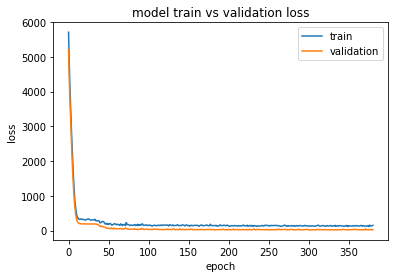

In [24]:
lstm_baseline(X,y_RNFL,"RNFL")

In [ ]:
## ignore below

### RNFL

In [686]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_RNFL, test_size = 0.2, random_state = 200)

In [687]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 200)

Train on 522 samples, validate on 131 samples
Epoch 1/1000
522/522 [==============================] - 15s 29ms/step - loss: 5813.8772 - mean_absolute_error: 75.0465 - val_loss: 5468.1655 - val_mean_absolute_error: 72.6578

Epoch 00001: val_loss improved from inf to 5468.16552, saving model to RNN_best.hdf5
Epoch 2/1000
522/522 [==============================] - 1s 1ms/step - loss: 5039.4006 - mean_absolute_error: 69.6668 - val_loss: 4599.2280 - val_mean_absolute_error: 66.4152

Epoch 00002: val_loss improved from 5468.16552 to 4599.22805, saving model to RNN_best.hdf5
Epoch 3/1000
522/522 [==============================] - 1s 2ms/step - loss: 4304.7142 - mean_absolute_error: 64.1807 - val_loss: 3925.7089 - val_mean_absolute_error: 61.1230

Epoch 00003: val_loss improved from 4599.22805 to 3925.70890, saving model to RNN_best.hdf5
Epoch 4/1000
522/522 [==============================] - 1s 2ms/step - loss: 3650.6117 - mean_absolute_error: 58.7828 - val_loss: 3246.7211 - val_mean_absolute


Epoch 00032: val_loss improved from 189.91495 to 189.07174, saving model to RNN_best.hdf5
Epoch 33/1000
522/522 [==============================] - 1s 1ms/step - loss: 324.1885 - mean_absolute_error: 14.4010 - val_loss: 188.5587 - val_mean_absolute_error: 11.0065

Epoch 00033: val_loss improved from 189.07174 to 188.55870, saving model to RNN_best.hdf5
Epoch 34/1000
522/522 [==============================] - 1s 1ms/step - loss: 300.5899 - mean_absolute_error: 13.5613 - val_loss: 212.3413 - val_mean_absolute_error: 11.6109

Epoch 00034: val_loss did not improve from 188.55870
Epoch 35/1000
522/522 [==============================] - 1s 1ms/step - loss: 311.2172 - mean_absolute_error: 13.7559 - val_loss: 210.6241 - val_mean_absolute_error: 11.5360

Epoch 00035: val_loss did not improve from 188.55870
Epoch 36/1000
522/522 [==============================] - 1s 2ms/step - loss: 301.9850 - mean_absolute_error: 13.7315 - val_loss: 174.8403 - val_mean_absolute_error: 10.3691

Epoch 00036: val_

522/522 [==============================] - 1s 1ms/step - loss: 146.5212 - mean_absolute_error: 9.4713 - val_loss: 40.9333 - val_mean_absolute_error: 4.8300

Epoch 00101: val_loss did not improve from 29.97851
Epoch 102/1000
522/522 [==============================] - 1s 1ms/step - loss: 135.7779 - mean_absolute_error: 9.1268 - val_loss: 32.4588 - val_mean_absolute_error: 4.0474

Epoch 00102: val_loss did not improve from 29.97851
Epoch 103/1000
522/522 [==============================] - 1s 1ms/step - loss: 139.2907 - mean_absolute_error: 9.1944 - val_loss: 31.0096 - val_mean_absolute_error: 3.8377

Epoch 00103: val_loss did not improve from 29.97851
Epoch 104/1000
522/522 [==============================] - 1s 1ms/step - loss: 156.4215 - mean_absolute_error: 9.6282 - val_loss: 31.4352 - val_mean_absolute_error: 3.8785

Epoch 00104: val_loss did not improve from 29.97851
Epoch 105/1000
522/522 [==============================] - 1s 1ms/step - loss: 151.1180 - mean_absolute_error: 9.7984 - 

522/522 [==============================] - 1s 2ms/step - loss: 143.5175 - mean_absolute_error: 9.3071 - val_loss: 26.2237 - val_mean_absolute_error: 3.6440

Epoch 00173: val_loss did not improve from 25.90062
Epoch 174/1000
522/522 [==============================] - 1s 2ms/step - loss: 127.1983 - mean_absolute_error: 8.8627 - val_loss: 26.8642 - val_mean_absolute_error: 3.8140

Epoch 00174: val_loss did not improve from 25.90062
Epoch 175/1000
522/522 [==============================] - 1s 2ms/step - loss: 123.7518 - mean_absolute_error: 8.6741 - val_loss: 24.2504 - val_mean_absolute_error: 3.5964

Epoch 00175: val_loss improved from 25.90062 to 24.25038, saving model to RNN_best.hdf5
Epoch 176/1000
522/522 [==============================] - 1s 1ms/step - loss: 138.4335 - mean_absolute_error: 9.1138 - val_loss: 24.2132 - val_mean_absolute_error: 3.5164

Epoch 00176: val_loss improved from 24.25038 to 24.21320, saving model to RNN_best.hdf5
Epoch 177/1000
522/522 [=======================

522/522 [==============================] - 1s 1ms/step - loss: 133.6472 - mean_absolute_error: 9.0380 - val_loss: 31.1433 - val_mean_absolute_error: 4.2220

Epoch 00245: val_loss did not improve from 22.59217
Epoch 246/1000
522/522 [==============================] - 1s 1ms/step - loss: 143.7319 - mean_absolute_error: 9.3668 - val_loss: 31.7831 - val_mean_absolute_error: 4.3124

Epoch 00246: val_loss did not improve from 22.59217
Epoch 247/1000
522/522 [==============================] - 1s 1ms/step - loss: 137.2677 - mean_absolute_error: 9.3342 - val_loss: 25.0393 - val_mean_absolute_error: 3.6124

Epoch 00247: val_loss did not improve from 22.59217
Epoch 248/1000
522/522 [==============================] - 1s 1ms/step - loss: 152.3307 - mean_absolute_error: 9.8566 - val_loss: 25.3280 - val_mean_absolute_error: 3.5851

Epoch 00248: val_loss did not improve from 22.59217
Epoch 249/1000
522/522 [==============================] - 1s 1ms/step - loss: 150.8369 - mean_absolute_error: 9.6230 - 

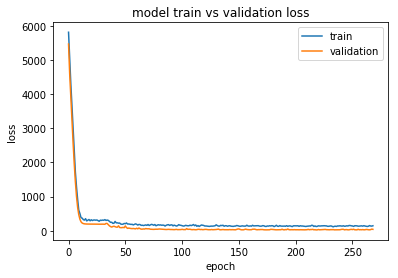

In [688]:
model_RNFL = lstm_baseline(X_train, y_train)
outputs = [layer.output for layer in model.layers]

In [689]:
y_pred = model_RNFL.predict(X_test)
y_pred = y_pred.flatten()
y_pred = y_pred.tolist()
dictionary_DF = {'predicted':y_pred, 'actual':y_test}
y_RNFL_DF = pd.DataFrame(dictionary_DF)

In [690]:
y_RNFL_DF

,predicted,actual
0,79.303093,74.0
1,98.612396,93.0
2,51.395008,54.0
3,82.982697,84.0
4,81.850433,81.0
5,71.222908,69.0
6,86.775566,87.0
7,73.106834,64.0
8,82.103714,76.0
9,94.369431,92.0


In [691]:
difference_RNFL = abs(y_RNFL_DF['predicted']-y_RNFL_DF['actual'])
difference_RNFL.describe()

count    164.000000
mean       3.566009
std        3.033462
min        0.010735
25%        1.517568
50%        2.732998
75%        5.307162
max       18.885056
dtype: float64

### MD

In [662]:
X_train, X_test, y_train, y_test = train_test_split(X, y_MD, test_size = 0.2, random_state = 200)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 200)

Train on 522 samples, validate on 131 samples
Epoch 1/1000
522/522 [==============================] - 14s 27ms/step - loss: 0.2388 - mean_absolute_error: 0.3890 - val_loss: 0.1609 - val_mean_absolute_error: 0.3190

Epoch 00001: val_loss improved from inf to 0.16087, saving model to RNN_best
Epoch 2/1000
522/522 [==============================] - 1s 1ms/step - loss: 0.1707 - mean_absolute_error: 0.3315 - val_loss: 0.1353 - val_mean_absolute_error: 0.2800

Epoch 00002: val_loss improved from 0.16087 to 0.13532, saving model to RNN_best
Epoch 3/1000
522/522 [==============================] - 1s 1ms/step - loss: 0.1364 - mean_absolute_error: 0.2882 - val_loss: 0.0989 - val_mean_absolute_error: 0.2286

Epoch 00003: val_loss improved from 0.13532 to 0.09887, saving model to RNN_best
Epoch 4/1000
522/522 [==============================] - 1s 1ms/step - loss: 0.1255 - mean_absolute_error: 0.2701 - val_loss: 0.0994 - val_mean_absolute_error: 0.2256

Epoch 00004: val_loss did not improve from 0.


Epoch 00036: val_loss improved from 0.07120 to 0.06615, saving model to RNN_best
Epoch 37/1000
522/522 [==============================] - 1s 1ms/step - loss: 0.0780 - mean_absolute_error: 0.2026 - val_loss: 0.0944 - val_mean_absolute_error: 0.1988

Epoch 00037: val_loss did not improve from 0.06615
Epoch 38/1000
522/522 [==============================] - 1s 2ms/step - loss: 0.0826 - mean_absolute_error: 0.2072 - val_loss: 0.0899 - val_mean_absolute_error: 0.1946

Epoch 00038: val_loss did not improve from 0.06615
Epoch 39/1000
522/522 [==============================] - 1s 1ms/step - loss: 0.0779 - mean_absolute_error: 0.1974 - val_loss: 0.0715 - val_mean_absolute_error: 0.1758

Epoch 00039: val_loss did not improve from 0.06615
Epoch 40/1000
522/522 [==============================] - 1s 1ms/step - loss: 0.0725 - mean_absolute_error: 0.1952 - val_loss: 0.0721 - val_mean_absolute_error: 0.1792

Epoch 00040: val_loss did not improve from 0.06615
Epoch 41/1000
522/522 [===================

522/522 [==============================] - 1s 2ms/step - loss: 0.0619 - mean_absolute_error: 0.1766 - val_loss: 0.0721 - val_mean_absolute_error: 0.1754

Epoch 00074: val_loss did not improve from 0.06244
Epoch 75/1000
522/522 [==============================] - 1s 2ms/step - loss: 0.0622 - mean_absolute_error: 0.1755 - val_loss: 0.0704 - val_mean_absolute_error: 0.1736

Epoch 00075: val_loss did not improve from 0.06244
Epoch 76/1000
522/522 [==============================] - 1s 2ms/step - loss: 0.0652 - mean_absolute_error: 0.1768 - val_loss: 0.0723 - val_mean_absolute_error: 0.1793

Epoch 00076: val_loss did not improve from 0.06244
Epoch 77/1000
522/522 [==============================] - 1s 2ms/step - loss: 0.0556 - mean_absolute_error: 0.1625 - val_loss: 0.0617 - val_mean_absolute_error: 0.1657

Epoch 00077: val_loss improved from 0.06244 to 0.06168, saving model to RNN_best
Epoch 78/1000
522/522 [==============================] - 1s 2ms/step - loss: 0.0534 - mean_absolute_error: 0

522/522 [==============================] - 1s 1ms/step - loss: 0.0357 - mean_absolute_error: 0.1334 - val_loss: 0.0792 - val_mean_absolute_error: 0.1981

Epoch 00148: val_loss did not improve from 0.05991
Epoch 149/1000
522/522 [==============================] - 1s 1ms/step - loss: 0.0397 - mean_absolute_error: 0.1380 - val_loss: 0.0720 - val_mean_absolute_error: 0.1933

Epoch 00149: val_loss did not improve from 0.05991
Epoch 150/1000
522/522 [==============================] - 1s 1ms/step - loss: 0.0401 - mean_absolute_error: 0.1437 - val_loss: 0.0636 - val_mean_absolute_error: 0.1734

Epoch 00150: val_loss did not improve from 0.05991
Epoch 151/1000
522/522 [==============================] - 1s 1ms/step - loss: 0.0406 - mean_absolute_error: 0.1383 - val_loss: 0.0800 - val_mean_absolute_error: 0.1894

Epoch 00151: val_loss did not improve from 0.05991
Epoch 152/1000
522/522 [==============================] - 1s 1ms/step - loss: 0.0365 - mean_absolute_error: 0.1348 - val_loss: 0.0713 -

522/522 [==============================] - 1s 2ms/step - loss: 0.0245 - mean_absolute_error: 0.1132 - val_loss: 0.0781 - val_mean_absolute_error: 0.1975

Epoch 00222: val_loss did not improve from 0.05701
Epoch 223/1000
522/522 [==============================] - 1s 2ms/step - loss: 0.0222 - mean_absolute_error: 0.1025 - val_loss: 0.0796 - val_mean_absolute_error: 0.1946

Epoch 00223: val_loss did not improve from 0.05701
Epoch 224/1000
522/522 [==============================] - 1s 2ms/step - loss: 0.0202 - mean_absolute_error: 0.1007 - val_loss: 0.0642 - val_mean_absolute_error: 0.1786

Epoch 00224: val_loss did not improve from 0.05701
Epoch 225/1000
522/522 [==============================] - 1s 2ms/step - loss: 0.0175 - mean_absolute_error: 0.0938 - val_loss: 0.0685 - val_mean_absolute_error: 0.1882

Epoch 00225: val_loss did not improve from 0.05701
Epoch 226/1000
522/522 [==============================] - 1s 1ms/step - loss: 0.0204 - mean_absolute_error: 0.1013 - val_loss: 0.0764 -

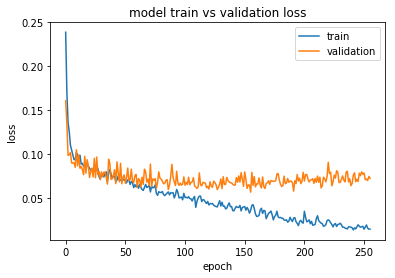

In [663]:
model_MD = lstm_baseline(X_train, y_train)
outputs = [layer.output for layer in model.layers]

In [670]:
y_pred = model_MD.predict(X_test)
y_pred = y_pred.flatten()
y_pred = y_pred.tolist()
dictionary_DF = {'predicted':y_pred, 'actual':y_test}
y_MD_DF = pd.DataFrame(dictionary_DF)
y_MD_DF

,predicted,actual
0,0.724535,0.641210
1,0.966149,0.709578
2,0.000000,0.021429
3,1.161104,0.995405
4,0.445089,0.503501
5,0.430304,0.317687
6,0.772315,0.719449
7,0.918608,1.233105
8,0.421411,0.070632
9,0.829184,0.944061


In [671]:
difference_MD = pd.Series(abs(y_test-y_pred))
difference_MD.describe()

count    164.000000
mean       0.198822
std        0.181547
min        0.001040
25%        0.057838
50%        0.157118
75%        0.315746
max        0.832233
dtype: float64

### VFI

In [672]:
X_train, X_test, y_train, y_test = train_test_split(X, y_VFI, test_size = 0.2, random_state = 200)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 200)

Train on 522 samples, validate on 131 samples
Epoch 1/1000
522/522 [==============================] - 16s 30ms/step - loss: 8076.0442 - mean_absolute_error: 87.8789 - val_loss: 7290.1289 - val_mean_absolute_error: 82.4523

Epoch 00001: val_loss improved from inf to 7290.12886, saving model to RNN_best
Epoch 2/1000
522/522 [==============================] - 1s 1ms/step - loss: 6967.7201 - mean_absolute_error: 81.4028 - val_loss: 6107.6505 - val_mean_absolute_error: 74.9731

Epoch 00002: val_loss improved from 7290.12886 to 6107.65048, saving model to RNN_best
Epoch 3/1000
522/522 [==============================] - 1s 1ms/step - loss: 5920.6131 - mean_absolute_error: 74.8351 - val_loss: 5223.3969 - val_mean_absolute_error: 69.1647

Epoch 00003: val_loss improved from 6107.65048 to 5223.39685, saving model to RNN_best
Epoch 4/1000
522/522 [==============================] - 1s 1ms/step - loss: 5017.0579 - mean_absolute_error: 68.7914 - val_loss: 4371.9909 - val_mean_absolute_error: 63.2445

522/522 [==============================] - 1s 2ms/step - loss: 205.5234 - mean_absolute_error: 11.0469 - val_loss: 83.4170 - val_mean_absolute_error: 6.0130

Epoch 00033: val_loss improved from 86.19032 to 83.41697, saving model to RNN_best
Epoch 34/1000
522/522 [==============================] - 1s 2ms/step - loss: 196.4889 - mean_absolute_error: 10.7550 - val_loss: 95.9889 - val_mean_absolute_error: 7.1757

Epoch 00034: val_loss did not improve from 83.41697
Epoch 35/1000
522/522 [==============================] - 1s 2ms/step - loss: 221.7964 - mean_absolute_error: 11.6863 - val_loss: 87.1457 - val_mean_absolute_error: 5.7316

Epoch 00035: val_loss did not improve from 83.41697
Epoch 36/1000
522/522 [==============================] - 1s 2ms/step - loss: 225.5998 - mean_absolute_error: 11.5937 - val_loss: 82.5609 - val_mean_absolute_error: 6.1756

Epoch 00036: val_loss improved from 83.41697 to 82.56086, saving model to RNN_best
Epoch 37/1000
522/522 [==============================] -

522/522 [==============================] - 1s 1ms/step - loss: 209.7478 - mean_absolute_error: 11.1742 - val_loss: 57.5178 - val_mean_absolute_error: 4.4102

Epoch 00104: val_loss did not improve from 57.25278
Epoch 105/1000
522/522 [==============================] - 1s 1ms/step - loss: 199.1259 - mean_absolute_error: 11.1234 - val_loss: 54.1409 - val_mean_absolute_error: 4.0095

Epoch 00105: val_loss improved from 57.25278 to 54.14091, saving model to RNN_best
Epoch 106/1000
522/522 [==============================] - 1s 1ms/step - loss: 182.0694 - mean_absolute_error: 10.6244 - val_loss: 59.5047 - val_mean_absolute_error: 4.6907

Epoch 00106: val_loss did not improve from 54.14091
Epoch 107/1000
522/522 [==============================] - 1s 2ms/step - loss: 211.2797 - mean_absolute_error: 11.1987 - val_loss: 60.9771 - val_mean_absolute_error: 5.3088

Epoch 00107: val_loss did not improve from 54.14091
Epoch 108/1000
522/522 [==============================] - 1s 2ms/step - loss: 187.24


Epoch 00174: val_loss did not improve from 27.89389
Epoch 175/1000
522/522 [==============================] - 1s 1ms/step - loss: 146.3808 - mean_absolute_error: 9.6029 - val_loss: 34.7233 - val_mean_absolute_error: 4.1013

Epoch 00175: val_loss did not improve from 27.89389
Epoch 176/1000
522/522 [==============================] - 1s 1ms/step - loss: 155.3004 - mean_absolute_error: 9.6941 - val_loss: 27.4927 - val_mean_absolute_error: 3.1374

Epoch 00176: val_loss improved from 27.89389 to 27.49274, saving model to RNN_best
Epoch 177/1000
522/522 [==============================] - 1s 1ms/step - loss: 168.9802 - mean_absolute_error: 10.2968 - val_loss: 31.1727 - val_mean_absolute_error: 3.9762

Epoch 00177: val_loss did not improve from 27.49274
Epoch 178/1000
522/522 [==============================] - 1s 1ms/step - loss: 162.7848 - mean_absolute_error: 10.1792 - val_loss: 35.7255 - val_mean_absolute_error: 4.2476

Epoch 00178: val_loss did not improve from 27.49274
Epoch 179/1000
522

522/522 [==============================] - 1s 1ms/step - loss: 167.5632 - mean_absolute_error: 10.1528 - val_loss: 26.3554 - val_mean_absolute_error: 3.1101

Epoch 00211: val_loss did not improve from 26.22433
Epoch 212/1000
522/522 [==============================] - 1s 1ms/step - loss: 151.6852 - mean_absolute_error: 9.5654 - val_loss: 27.1558 - val_mean_absolute_error: 3.5397

Epoch 00212: val_loss did not improve from 26.22433
Epoch 213/1000
522/522 [==============================] - 1s 1ms/step - loss: 157.7808 - mean_absolute_error: 10.0044 - val_loss: 40.6740 - val_mean_absolute_error: 4.3912

Epoch 00213: val_loss did not improve from 26.22433
Epoch 214/1000
522/522 [==============================] - 1s 1ms/step - loss: 160.5428 - mean_absolute_error: 10.1113 - val_loss: 22.5089 - val_mean_absolute_error: 2.9736

Epoch 00214: val_loss improved from 26.22433 to 22.50893, saving model to RNN_best
Epoch 215/1000
522/522 [==============================] - 1s 1ms/step - loss: 148.524

522/522 [==============================] - 1s 1ms/step - loss: 136.1768 - mean_absolute_error: 9.0661 - val_loss: 27.1950 - val_mean_absolute_error: 3.6609

Epoch 00283: val_loss did not improve from 21.76511
Epoch 284/1000
522/522 [==============================] - 1s 2ms/step - loss: 144.0241 - mean_absolute_error: 9.4397 - val_loss: 28.1009 - val_mean_absolute_error: 3.9031

Epoch 00284: val_loss did not improve from 21.76511
Epoch 285/1000
522/522 [==============================] - 1s 2ms/step - loss: 156.4836 - mean_absolute_error: 9.8468 - val_loss: 28.8607 - val_mean_absolute_error: 3.3643

Epoch 00285: val_loss did not improve from 21.76511
Epoch 286/1000
522/522 [==============================] - 1s 2ms/step - loss: 155.5307 - mean_absolute_error: 9.8081 - val_loss: 35.8969 - val_mean_absolute_error: 4.2685

Epoch 00286: val_loss did not improve from 21.76511
Epoch 287/1000
522/522 [==============================] - 1s 1ms/step - loss: 136.7586 - mean_absolute_error: 9.2591 - 


Epoch 00319: val_loss did not improve from 21.76511
Epoch 320/1000
522/522 [==============================] - 1s 2ms/step - loss: 161.8636 - mean_absolute_error: 10.0138 - val_loss: 29.1219 - val_mean_absolute_error: 3.6036

Epoch 00320: val_loss did not improve from 21.76511
Epoch 321/1000
522/522 [==============================] - 1s 1ms/step - loss: 149.2894 - mean_absolute_error: 9.5911 - val_loss: 25.7514 - val_mean_absolute_error: 3.2375

Epoch 00321: val_loss did not improve from 21.76511
Epoch 322/1000
522/522 [==============================] - 1s 1ms/step - loss: 152.1001 - mean_absolute_error: 9.6740 - val_loss: 33.1222 - val_mean_absolute_error: 4.0915

Epoch 00322: val_loss did not improve from 21.76511
Epoch 323/1000
522/522 [==============================] - 1s 1ms/step - loss: 170.6538 - mean_absolute_error: 10.3086 - val_loss: 29.3434 - val_mean_absolute_error: 3.2371

Epoch 00323: val_loss did not improve from 21.76511
Epoch 324/1000
522/522 [=========================

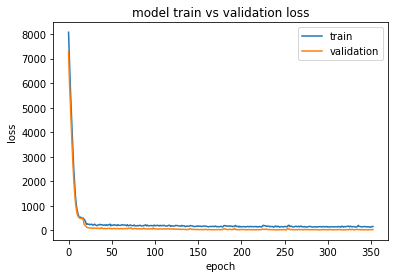

In [673]:
model_VFI = lstm_baseline(X_train, y_train)
outputs = [layer.output for layer in model.layers]

In [674]:
y_pred = model_VFI.predict(X_test)
y_pred = y_pred.flatten()
y_pred = y_pred.tolist()
dictionary_DF = {'predicted':y_pred, 'actual':y_test}
y_VFI_DF = pd.DataFrame(dictionary_DF)
y_VFI_DF

,predicted,actual
0,97.056282,100.0
1,95.747429,98.0
2,27.158716,46.0
3,94.680809,99.0
4,95.711060,95.0
5,89.609360,92.0
6,96.843559,99.0
7,91.935715,99.0
8,89.532005,69.0
9,96.473885,99.0


In [675]:
y_VFI_DF
difference_VFI = pd.Series(abs(y_test-y_pred))
difference_VFI.describe()

count    164.000000
mean       5.645670
std        7.838282
min        0.000656
25%        2.136494
50%        3.224079
75%        6.565681
max       74.494698
dtype: float64

### GCA

In [676]:
X_train, X_test, y_train, y_test = train_test_split(X, y_GCA, test_size = 0.2, random_state = 200)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 200)

Train on 522 samples, validate on 131 samples
Epoch 1/1000
522/522 [==============================] - 14s 28ms/step - loss: 4754.4268 - mean_absolute_error: 68.2704 - val_loss: 4213.3220 - val_mean_absolute_error: 64.2058

Epoch 00001: val_loss improved from inf to 4213.32199, saving model to RNN_best
Epoch 2/1000
522/522 [==============================] - 1s 1ms/step - loss: 3944.8978 - mean_absolute_error: 62.0172 - val_loss: 3373.4534 - val_mean_absolute_error: 57.2962

Epoch 00002: val_loss improved from 4213.32199 to 3373.45343, saving model to RNN_best
Epoch 3/1000
522/522 [==============================] - 1s 1ms/step - loss: 3201.1428 - mean_absolute_error: 55.6783 - val_loss: 2721.3796 - val_mean_absolute_error: 51.2735

Epoch 00003: val_loss improved from 3373.45343 to 2721.37963, saving model to RNN_best
Epoch 4/1000
522/522 [==============================] - 1s 2ms/step - loss: 2557.6460 - mean_absolute_error: 49.4950 - val_loss: 2059.3238 - val_mean_absolute_error: 44.3517

522/522 [==============================] - 1s 1ms/step - loss: 109.9587 - mean_absolute_error: 8.2176 - val_loss: 33.3889 - val_mean_absolute_error: 4.3426

Epoch 00033: val_loss improved from 38.20998 to 33.38887, saving model to RNN_best
Epoch 34/1000
522/522 [==============================] - 1s 1ms/step - loss: 130.7605 - mean_absolute_error: 8.8876 - val_loss: 31.5125 - val_mean_absolute_error: 4.0492

Epoch 00034: val_loss improved from 33.38887 to 31.51248, saving model to RNN_best
Epoch 35/1000
522/522 [==============================] - 1s 1ms/step - loss: 119.4262 - mean_absolute_error: 8.4228 - val_loss: 29.3453 - val_mean_absolute_error: 3.8816

Epoch 00035: val_loss improved from 31.51248 to 29.34531, saving model to RNN_best
Epoch 36/1000
522/522 [==============================] - 1s 1ms/step - loss: 104.6377 - mean_absolute_error: 7.9908 - val_loss: 24.6887 - val_mean_absolute_error: 3.6433

Epoch 00036: val_loss improved from 29.34531 to 24.68875, saving model to RNN_bes


Epoch 00068: val_loss did not improve from 10.79627
Epoch 69/1000
522/522 [==============================] - 1s 2ms/step - loss: 90.1876 - mean_absolute_error: 7.4328 - val_loss: 14.2918 - val_mean_absolute_error: 3.0910

Epoch 00069: val_loss did not improve from 10.79627
Epoch 70/1000
522/522 [==============================] - 1s 2ms/step - loss: 94.5433 - mean_absolute_error: 7.7328 - val_loss: 12.0704 - val_mean_absolute_error: 2.7059

Epoch 00070: val_loss did not improve from 10.79627
Epoch 71/1000
522/522 [==============================] - 1s 2ms/step - loss: 97.2666 - mean_absolute_error: 7.6506 - val_loss: 10.8933 - val_mean_absolute_error: 2.5137

Epoch 00071: val_loss did not improve from 10.79627
Epoch 72/1000
522/522 [==============================] - 1s 1ms/step - loss: 91.5834 - mean_absolute_error: 7.5726 - val_loss: 13.5788 - val_mean_absolute_error: 3.0096

Epoch 00072: val_loss did not improve from 10.79627
Epoch 73/1000
522/522 [==============================] - 1s


Epoch 00105: val_loss did not improve from 9.29092
Epoch 106/1000
522/522 [==============================] - 1s 1ms/step - loss: 89.5416 - mean_absolute_error: 7.6127 - val_loss: 20.1641 - val_mean_absolute_error: 3.8083

Epoch 00106: val_loss did not improve from 9.29092
Epoch 107/1000
522/522 [==============================] - 1s 1ms/step - loss: 100.9564 - mean_absolute_error: 7.9096 - val_loss: 9.0757 - val_mean_absolute_error: 2.2239

Epoch 00107: val_loss improved from 9.29092 to 9.07568, saving model to RNN_best
Epoch 108/1000
522/522 [==============================] - 1s 1ms/step - loss: 80.2380 - mean_absolute_error: 7.2593 - val_loss: 9.2648 - val_mean_absolute_error: 2.2994

Epoch 00108: val_loss did not improve from 9.07568
Epoch 109/1000
522/522 [==============================] - 1s 1ms/step - loss: 84.9054 - mean_absolute_error: 7.3816 - val_loss: 9.1681 - val_mean_absolute_error: 2.2452

Epoch 00109: val_loss did not improve from 9.07568
Epoch 110/1000
522/522 [========

522/522 [==============================] - 1s 1ms/step - loss: 75.3393 - mean_absolute_error: 6.8526 - val_loss: 15.0400 - val_mean_absolute_error: 3.1825

Epoch 00179: val_loss did not improve from 7.17537
Epoch 180/1000
522/522 [==============================] - 1s 2ms/step - loss: 83.9223 - mean_absolute_error: 7.2394 - val_loss: 13.6330 - val_mean_absolute_error: 3.0572

Epoch 00180: val_loss did not improve from 7.17537
Epoch 181/1000
522/522 [==============================] - 1s 2ms/step - loss: 79.9701 - mean_absolute_error: 6.8412 - val_loss: 8.5471 - val_mean_absolute_error: 2.2626

Epoch 00181: val_loss did not improve from 7.17537
Epoch 182/1000
522/522 [==============================] - 1s 2ms/step - loss: 72.3212 - mean_absolute_error: 6.7124 - val_loss: 9.5521 - val_mean_absolute_error: 2.2715

Epoch 00182: val_loss did not improve from 7.17537
Epoch 183/1000
522/522 [==============================] - 1s 2ms/step - loss: 87.0611 - mean_absolute_error: 7.4017 - val_loss: 8


Epoch 00215: val_loss did not improve from 6.56699
Epoch 216/1000
522/522 [==============================] - 1s 2ms/step - loss: 96.2375 - mean_absolute_error: 7.6231 - val_loss: 18.8497 - val_mean_absolute_error: 3.8264

Epoch 00216: val_loss did not improve from 6.56699
Epoch 217/1000
522/522 [==============================] - 1s 2ms/step - loss: 81.3658 - mean_absolute_error: 7.0306 - val_loss: 9.6923 - val_mean_absolute_error: 2.0843

Epoch 00217: val_loss did not improve from 6.56699
Epoch 218/1000
522/522 [==============================] - 1s 2ms/step - loss: 80.2189 - mean_absolute_error: 6.8946 - val_loss: 9.0284 - val_mean_absolute_error: 2.1709

Epoch 00218: val_loss did not improve from 6.56699
Epoch 219/1000
522/522 [==============================] - 1s 2ms/step - loss: 90.5760 - mean_absolute_error: 7.4709 - val_loss: 8.9590 - val_mean_absolute_error: 2.1839

Epoch 00219: val_loss did not improve from 6.56699
Epoch 220/1000
522/522 [==============================] - 1s 2m

522/522 [==============================] - 1s 1ms/step - loss: 85.3840 - mean_absolute_error: 7.1743 - val_loss: 7.9392 - val_mean_absolute_error: 2.0444

Epoch 00253: val_loss did not improve from 6.56699
Epoch 254/1000
522/522 [==============================] - 1s 2ms/step - loss: 74.7378 - mean_absolute_error: 6.8263 - val_loss: 7.6345 - val_mean_absolute_error: 1.9671

Epoch 00254: val_loss did not improve from 6.56699
Epoch 255/1000
522/522 [==============================] - 1s 1ms/step - loss: 75.0731 - mean_absolute_error: 6.7598 - val_loss: 8.9351 - val_mean_absolute_error: 2.1913

Epoch 00255: val_loss did not improve from 6.56699
Epoch 256/1000
522/522 [==============================] - 1s 1ms/step - loss: 79.1230 - mean_absolute_error: 7.2427 - val_loss: 6.8174 - val_mean_absolute_error: 1.9777

Epoch 00256: val_loss did not improve from 6.56699
Epoch 257/1000
522/522 [==============================] - 1s 1ms/step - loss: 74.1047 - mean_absolute_error: 6.8490 - val_loss: 18.

522/522 [==============================] - 1s 2ms/step - loss: 77.2313 - mean_absolute_error: 6.9781 - val_loss: 7.3699 - val_mean_absolute_error: 2.1231

Epoch 00290: val_loss did not improve from 6.32535
Epoch 291/1000
522/522 [==============================] - 1s 1ms/step - loss: 79.7927 - mean_absolute_error: 7.0160 - val_loss: 6.7474 - val_mean_absolute_error: 1.8496

Epoch 00291: val_loss did not improve from 6.32535
Epoch 292/1000
522/522 [==============================] - 1s 2ms/step - loss: 78.2354 - mean_absolute_error: 7.0470 - val_loss: 10.0625 - val_mean_absolute_error: 2.5253

Epoch 00292: val_loss did not improve from 6.32535
Epoch 293/1000
522/522 [==============================] - 1s 1ms/step - loss: 77.0865 - mean_absolute_error: 7.0037 - val_loss: 7.2488 - val_mean_absolute_error: 2.0482

Epoch 00293: val_loss did not improve from 6.32535
Epoch 294/1000
522/522 [==============================] - 1s 1ms/step - loss: 80.0493 - mean_absolute_error: 7.0269 - val_loss: 9.

522/522 [==============================] - 1s 1ms/step - loss: 79.8840 - mean_absolute_error: 6.9294 - val_loss: 7.0756 - val_mean_absolute_error: 1.9596

Epoch 00327: val_loss did not improve from 6.23945
Epoch 328/1000
522/522 [==============================] - 1s 1ms/step - loss: 77.8572 - mean_absolute_error: 7.0680 - val_loss: 7.5670 - val_mean_absolute_error: 2.0723

Epoch 00328: val_loss did not improve from 6.23945
Epoch 329/1000
522/522 [==============================] - 1s 1ms/step - loss: 95.0077 - mean_absolute_error: 7.6465 - val_loss: 6.4825 - val_mean_absolute_error: 1.9062

Epoch 00329: val_loss did not improve from 6.23945
Epoch 330/1000
522/522 [==============================] - 1s 1ms/step - loss: 78.6150 - mean_absolute_error: 6.9029 - val_loss: 6.9302 - val_mean_absolute_error: 1.8908

Epoch 00330: val_loss did not improve from 6.23945
Epoch 331/1000
522/522 [==============================] - 1s 1ms/step - loss: 66.8682 - mean_absolute_error: 6.4857 - val_loss: 8.7

522/522 [==============================] - 1s 1ms/step - loss: 76.7445 - mean_absolute_error: 6.9056 - val_loss: 7.1803 - val_mean_absolute_error: 1.9257

Epoch 00364: val_loss did not improve from 5.91518
Epoch 365/1000
522/522 [==============================] - 1s 1ms/step - loss: 77.1282 - mean_absolute_error: 7.1528 - val_loss: 9.8750 - val_mean_absolute_error: 2.4600

Epoch 00365: val_loss did not improve from 5.91518
Epoch 366/1000
522/522 [==============================] - 1s 1ms/step - loss: 83.4928 - mean_absolute_error: 7.2517 - val_loss: 6.2818 - val_mean_absolute_error: 1.8377

Epoch 00366: val_loss did not improve from 5.91518
Epoch 367/1000
522/522 [==============================] - 1s 2ms/step - loss: 70.7328 - mean_absolute_error: 6.5987 - val_loss: 7.8276 - val_mean_absolute_error: 2.1038

Epoch 00367: val_loss did not improve from 5.91518
Epoch 368/1000
522/522 [==============================] - 1s 2ms/step - loss: 75.3544 - mean_absolute_error: 6.7977 - val_loss: 6.5

522/522 [==============================] - 1s 1ms/step - loss: 79.6787 - mean_absolute_error: 7.0539 - val_loss: 9.5157 - val_mean_absolute_error: 2.5123

Epoch 00401: val_loss did not improve from 5.23042
Epoch 402/1000
522/522 [==============================] - 1s 1ms/step - loss: 69.5614 - mean_absolute_error: 6.7424 - val_loss: 11.3921 - val_mean_absolute_error: 2.8562

Epoch 00402: val_loss did not improve from 5.23042
Epoch 403/1000
522/522 [==============================] - 1s 1ms/step - loss: 72.2247 - mean_absolute_error: 6.5603 - val_loss: 8.3632 - val_mean_absolute_error: 2.3359

Epoch 00403: val_loss did not improve from 5.23042
Epoch 404/1000
522/522 [==============================] - 1s 2ms/step - loss: 69.7936 - mean_absolute_error: 6.8475 - val_loss: 7.6674 - val_mean_absolute_error: 2.2011

Epoch 00404: val_loss did not improve from 5.23042
Epoch 405/1000
522/522 [==============================] - 1s 2ms/step - loss: 84.2130 - mean_absolute_error: 7.4471 - val_loss: 7.

522/522 [==============================] - 1s 1ms/step - loss: 71.4000 - mean_absolute_error: 6.6299 - val_loss: 6.7014 - val_mean_absolute_error: 1.9128

Epoch 00475: val_loss did not improve from 5.23042
Epoch 476/1000
522/522 [==============================] - 1s 2ms/step - loss: 75.1251 - mean_absolute_error: 6.8159 - val_loss: 7.3790 - val_mean_absolute_error: 2.0909

Epoch 00476: val_loss did not improve from 5.23042
Epoch 477/1000
522/522 [==============================] - 1s 2ms/step - loss: 78.5064 - mean_absolute_error: 6.8907 - val_loss: 7.5792 - val_mean_absolute_error: 2.1823

Epoch 00477: val_loss did not improve from 5.23042
Epoch 478/1000
522/522 [==============================] - 1s 2ms/step - loss: 70.0527 - mean_absolute_error: 6.5190 - val_loss: 10.2366 - val_mean_absolute_error: 2.6364

Epoch 00478: val_loss did not improve from 5.23042
Epoch 479/1000
522/522 [==============================] - 1s 2ms/step - loss: 71.4145 - mean_absolute_error: 6.5818 - val_loss: 6.

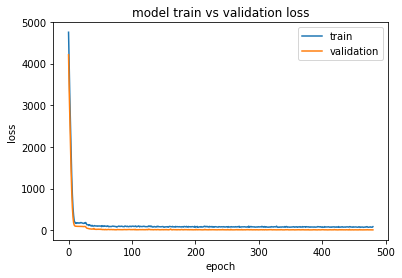

In [677]:
model_GCA = lstm_baseline(X_train, y_train)
outputs = [layer.output for layer in model.layers]

In [678]:
y_pred = model_GCA.predict(X_test)
y_pred = y_pred.flatten()
y_pred = y_pred.tolist()
dictionary_DF = {'predicted':y_pred, 'actual':y_test}
y_GCA_DF = pd.DataFrame(dictionary_DF)
y_GCA_DF

,predicted,actual
0,80.590385,81
1,88.393562,84
2,52.214680,50
3,63.294174,61
4,70.389214,73
5,64.956833,65
6,74.759544,76
7,66.081177,65
8,73.022781,74
9,74.578262,75


In [679]:
y_GCA_DF
difference_GCA = pd.Series(abs(y_test-y_pred))
difference_GCA.describe()

count    164.000000
mean       2.369138
std        3.398933
min        0.001236
25%        0.692579
50%        1.495090
75%        2.637930
max       32.579651
dtype: float64